In [106]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go


In [60]:
# load the data get_around_delay_analysis
data_delay = pd.read_excel('get_around_delay_analysis.xlsx')

In [61]:
df=data_delay.copy()
df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN


In [62]:
df.columns

Index(['rental_id', 'car_id', 'checkin_type', 'state',
       'delay_at_checkout_in_minutes', 'previous_ended_rental_id',
       'time_delta_with_previous_rental_in_minutes'],
      dtype='object')

In [63]:
df.shape

(21310, 7)

In [64]:
# check the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21310 entries, 0 to 21309
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rental_id                                   21310 non-null  int64  
 1   car_id                                      21310 non-null  int64  
 2   checkin_type                                21310 non-null  object 
 3   state                                       21310 non-null  object 
 4   delay_at_checkout_in_minutes                16346 non-null  float64
 5   previous_ended_rental_id                    1841 non-null   float64
 6   time_delta_with_previous_rental_in_minutes  1841 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB


In [65]:
#percentage of missing values
print(f"The percentage of missing value in the dataset :\n {(df.isnull().sum()/df.shape[0]*100).round(2)}")

The percentage of missing value in the dataset :
 rental_id                                      0.00
car_id                                         0.00
checkin_type                                   0.00
state                                          0.00
delay_at_checkout_in_minutes                  23.29
previous_ended_rental_id                      91.36
time_delta_with_previous_rental_in_minutes    91.36
dtype: float64


In [66]:
#Some statistics
df.describe().round(2)

,rental_id,car_id,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.00,21310.00,16346.00,1841.00,1841.00
mean,549712.88,350030.60,59.70,550127.41,279.29
std,13863.45,58206.25,1002.56,13184.02,254.59
min,504806.00,159250.00,-22433.00,505628.00,0.00
25%,540613.25,317639.00,-36.00,540896.00,60.00
50%,550350.00,368717.00,9.00,550567.00,180.00
75%,560468.50,394928.00,67.00,560823.00,540.00
max,576401.00,417675.00,71084.00,575053.00,720.00


In [67]:
#filling missing values with mean in the dataset
df['delay_at_checkout_in_minutes']=df['delay_at_checkout_in_minutes'].fillna(df['delay_at_checkout_in_minutes'].mean())
#df=df['delay_at_checkout_in_minutes'].fillna(df['delay_at_checkout_in_minutes'].mean())



In [68]:
df.describe().round(2)

,rental_id,car_id,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.00,21310.00,21310.00,1841.00,1841.00
mean,549712.88,350030.60,59.70,550127.41,279.29
std,13863.45,58206.25,878.06,13184.02,254.59
min,504806.00,159250.00,-22433.00,505628.00,0.00
25%,540613.25,317639.00,-16.00,540896.00,60.00
50%,550350.00,368717.00,36.00,550567.00,180.00
75%,560468.50,394928.00,59.70,560823.00,540.00
max,576401.00,417675.00,71084.00,575053.00,720.00


In [69]:
# #Droping previous_ended_rental_id and time_delta_with_previous_rental_in_minutes  column
# cols_to_drop=['previous_ended_rental_id','time_delta_with_previous_rental_in_minutes']
# df=df.drop(cols_to_drop,axis=1)
# display(df.head())

Count of checkin type :
 checkin_type
mobile     17003
connect     4307
Name: count, dtype: int64


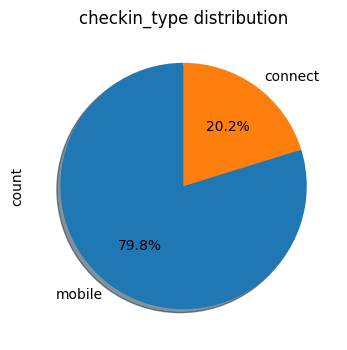

In [70]:
# checkin_type distribution and pie chart
print(f"Count of checkin type :\n {df.checkin_type.value_counts()}")
plt.figure(figsize=(4,4))
df.checkin_type.value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('checkin_type distribution')
plt.show()



Count of state :
 state
ended       18045
canceled     3265
Name: count, dtype: int64


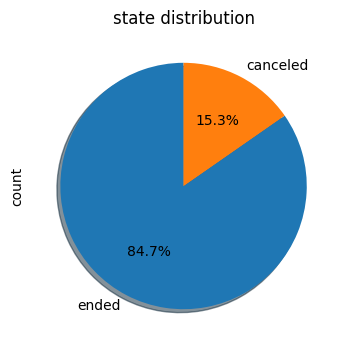

In [71]:
# state distribution and pie chart
print(f"Count of state :\n {df.state.value_counts()}")
plt.figure(figsize=(4,4))
df.state.value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('state distribution')
plt.show()

In [72]:
#Separate on late and time delay basing on delay_at_checkout_in_minutes

df['status'] = df['delay_at_checkout_in_minutes'].apply(lambda x: 'late' if x > 0 else 'on_time')

#percentage of on_time and late
perc = (df["status"].value_counts()/df.shape[0]*100)
print(f"The percentage of  late :\n {perc.iloc[0]}")
print(f"The percentage of on_time :\n {perc.iloc[1]}")


The percentage of  late :
 67.42374472078836
The percentage of on_time :
 32.57625527921164


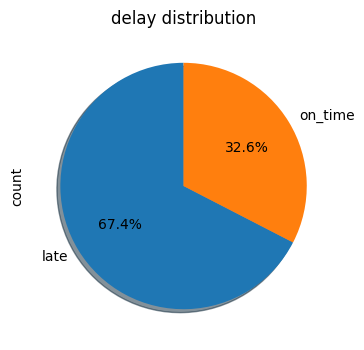

In [73]:

plt.figure(figsize=(4,4))
df.status.value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('delay distribution')
plt.show()

  checkin_type   status  count
0      connect     late   2364
1       mobile     late  12004
2      connect  on_time   1943
3       mobile  on_time   4999


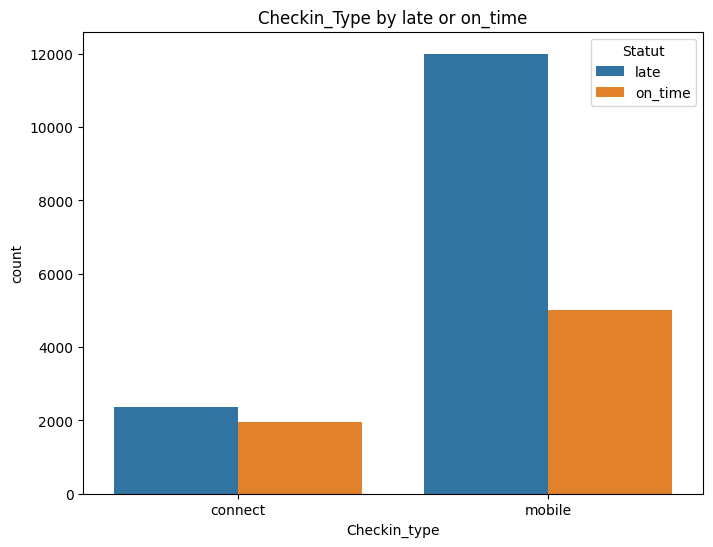

In [74]:
grouped = df.groupby(['checkin_type', 'status']).size().unstack(fill_value=0).reset_index()
melted = grouped.melt(id_vars='checkin_type', var_name='status', value_name='count')
print(melted)
plt.figure(figsize=(8, 6))
sns.barplot(data=melted, x='checkin_type', y='count', hue='status')
plt.title('Checkin_Type by late or on_time')
plt.xlabel('Checkin_type')
plt.legend(title='Statut')
plt.show()


In [75]:
#State and checkin_type
grouped = df.groupby(['state', 'checkin_type']).size().unstack(fill_value=0).reset_index()
melted = grouped.melt(id_vars='state', var_name='checkin_type', value_name='count')
print(melted.groupby('checkin_type')['count'].apply(lambda x: x / x.sum() * 100))

checkin_type   
connect       0    18.527978
              1    81.472022
mobile        2    14.509204
              3    85.490796
Name: count, dtype: float64


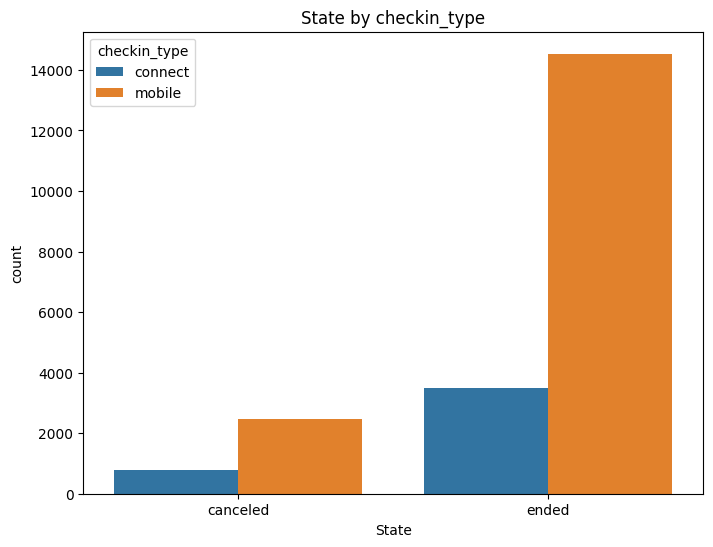

In [76]:

plt.figure(figsize=(8, 6))
sns.barplot(data=melted, x='state', y='count', hue='checkin_type')
plt.title('State by checkin_type')
plt.xlabel('State')
plt.legend(title='checkin_type')
plt.show()

The impact of late checkin on the next rent

In [78]:
df_late=df[df['status']=='late']
df_late.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,status
0,505000,363965,mobile,canceled,59.701517,NaN,NaN,late
2,508131,359049,connect,ended,70.000000,NaN,NaN,late
3,508865,299063,connect,canceled,59.701517,NaN,NaN,late
4,511440,313932,mobile,ended,59.701517,NaN,NaN,late
8,512475,322502,mobile,canceled,59.701517,NaN,NaN,late


In [79]:
avg_delay = df_late['time_delta_with_previous_rental_in_minutes'].mean()
max_delay = df_late['time_delta_with_previous_rental_in_minutes'].max()
min_delay = df_late['time_delta_with_previous_rental_in_minutes'].min()

print("Average delay in minutes for the next driver:", avg_delay)
print("Maximum delay in minutes for the next driver:", max_delay)
print("Minimum delay in minutes for the next driver:", min_delay)

Average delay in minutes for the next driver: 268.3776595744681
Maximum delay in minutes for the next driver: 720.0
Minimum delay in minutes for the next driver: 0.0


In [86]:
# Difference between delay at checkout and the delta with previous rental on late status
df_late.loc[:, 'minutes_passed_checkin_time']  = df_late['delay_at_checkout_in_minutes'] - df_late['time_delta_with_previous_rental_in_minutes']
df_late.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,status,minutes_passed_checkin_time
6,511639,370585,connect,ended,-15.000000,563782.0,570.0,on_time,-585.000000
19,519491,312389,mobile,ended,58.000000,545639.0,420.0,late,-362.000000
23,521156,392479,mobile,ended,59.701517,537298.0,0.0,late,59.701517
34,525044,349751,mobile,ended,59.701517,510607.0,60.0,late,-0.298483
40,528808,181625,connect,ended,-76.000000,557404.0,330.0,on_time,-406.000000


In [105]:
df_late = df_late.dropna(subset=['time_delta_with_previous_rental_in_minutes'])

threshold_range = np.arange(0, 1440, step=60) 
impacted_list_mobile = []
impacted_list_connect = []
impacted_list_total = []
solved_list_mobile = []
solved_list_connect = []
solved_list_total = []
for t in range(1440):
    connect_impact = df_late[(df_late['checkin_type'] == 'connect') & (df_late['time_delta_with_previous_rental_in_minutes'] < t)]
    mobile_impact = df_late[(df_late['checkin_type'] == 'mobile') & (df_late['time_delta_with_previous_rental_in_minutes'] < t)]
    impacted = df_late[df_late['time_delta_with_previous_rental_in_minutes'] < t]
    impacted_list_connect.append(len(connect_impact))
    impacted_list_mobile.append(len(mobile_impact))
    impacted_list_total.append(len(impacted))

    solved = df_late[(df_late['minutes_passed_checkin_time'] > 0) & (df_late['delay_at_checkout_in_minutes'] < t)]
    connect_solved = solved[(solved['checkin_type'] == 'connect') & (solved['delay_at_checkout_in_minutes'] < t)]
    mobile_solved = solved[(solved['checkin_type'] == 'mobile') & (solved['delay_at_checkout_in_minutes'] < t)]
    solved_list_connect.append(len(connect_solved))
    solved_list_mobile.append(len(mobile_solved))
    solved_list_total.append(len(solved))


In [103]:

x_values = list(range(1440))
# Création des traces pour les graphiques impactés
total_impacted_cars = go.Scatter(x=x_values, y=impacted_list_total, name='All cars')
impacted_connect_cars = go.Scatter(x=x_values, y=impacted_list_connect, name='Connect cars')
impacted_mobile_cars = go.Scatter(x=x_values, y=impacted_list_mobile, name='Mobile cars')

# Création des layouts pour les graphiques impactés
layout_impacted = go.Layout(
    title='Number of impacted cases by threshold',
    xaxis=dict(title='Threshold in minutes'),
    yaxis=dict(title='Number of impacted cases'),
    xaxis_tickvals=list(range(0, 1440, 60)),  # Échelle des ticks toutes les 60 minutes
    legend=dict(orientation='h', yanchor='bottom', xanchor='right', y=1.02, x=1)
)

# Création des figures pour les graphiques impactés
fig_impacted = go.Figure(data=[total_impacted_cars, impacted_connect_cars, impacted_mobile_cars], layout=layout_impacted)

# Affichage du graphique impacté
fig_impacted.show()



In [104]:
# Création des traces pour les graphiques résolus
total_solved_cars = go.Scatter(x=x_values, y=solved_list_total, name='All cars')
connect_solved_cars = go.Scatter(x=x_values, y=solved_list_connect, name='Connect cars')
mobile_solved_cars = go.Scatter(x=x_values, y=solved_list_mobile, name='Mobile cars')

# Création des layouts pour les graphiques résolus
layout_solved = go.Layout(
    title='Threshold solved cases number',
    xaxis=dict(title='Threshold in minutes'),
    yaxis=dict(title='Number of cases solved'),
    xaxis_tickvals=list(range(0, 1440, 60)),  # Échelle des ticks toutes les 60 minutes
    legend=dict(orientation='h', yanchor='bottom', xanchor='right', y=1.02, x=1)
)

# Création des figures pour les graphiques résolus
fig_solved = go.Figure(data=[total_solved_cars, connect_solved_cars, mobile_solved_cars], layout=layout_solved)
# Affichage du graphique résolu
fig_solved.show()